In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../datasets/dataset.csv", engine='pyarrow', usecols=["timestamp", "value"])

In [3]:
df.describe()

,timestamp,value
count,10320,10320.000000
mean,2014-10-16 11:45:00,15137.569380
min,2014-07-01 00:00:00,8.000000
25%,2014-08-23 17:52:30,10262.000000
50%,2014-10-16 11:45:00,16778.000000
75%,2014-12-09 05:37:30,19838.750000
max,2015-01-31 23:30:00,39197.000000
std,NaN,6939.495808


<Axes: xlabel='Дата', ylabel='Количество пассажиров'>

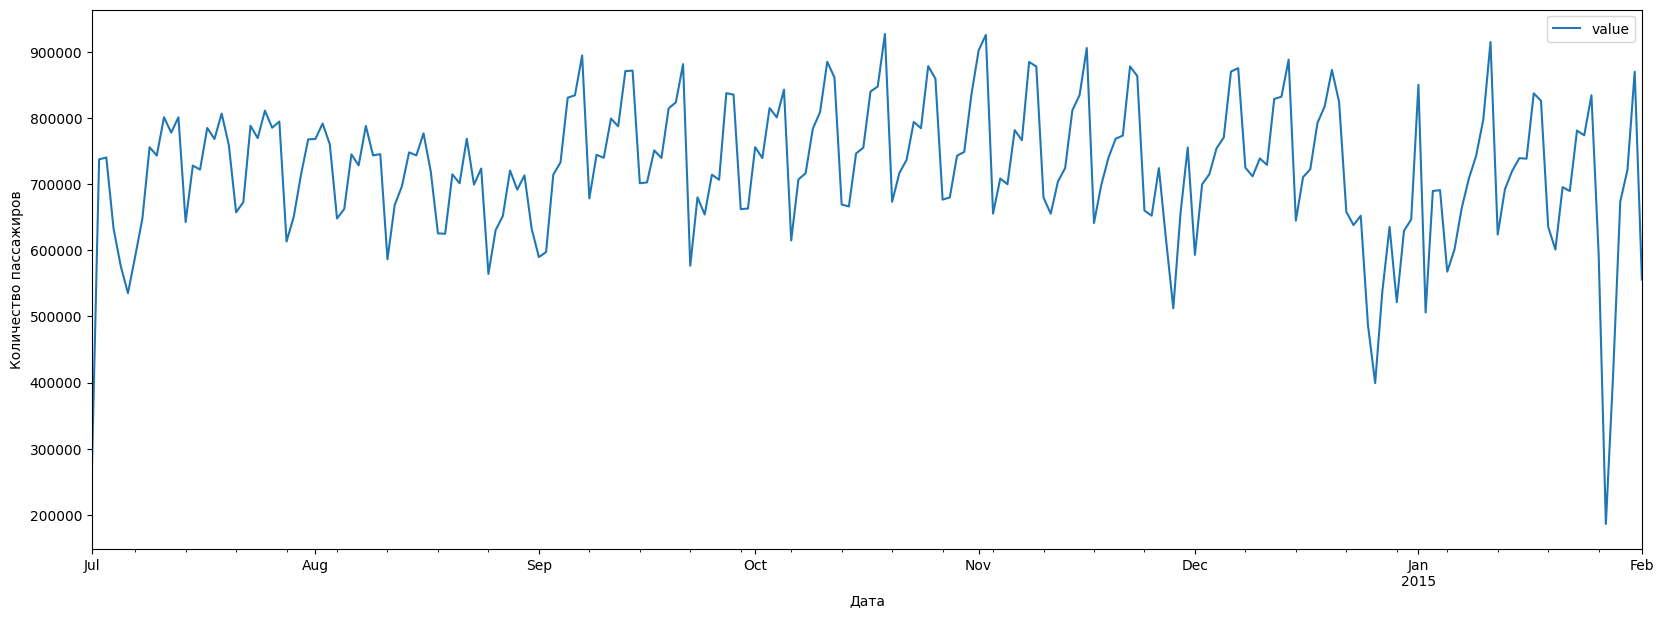

In [4]:
df_dates = df[["timestamp", "value"]].copy()
df_dates["timestamp"] = df_dates["timestamp"].dt.round('D')
df_dates = df_dates.groupby(by="timestamp").sum().reset_index()
df_dates.plot(x="timestamp", y="value", figsize=(20, 7), xlabel='Дата', ylabel='Количество пассажиров')

<Axes: xlabel='Дата', ylabel='Количество пассажиров'>

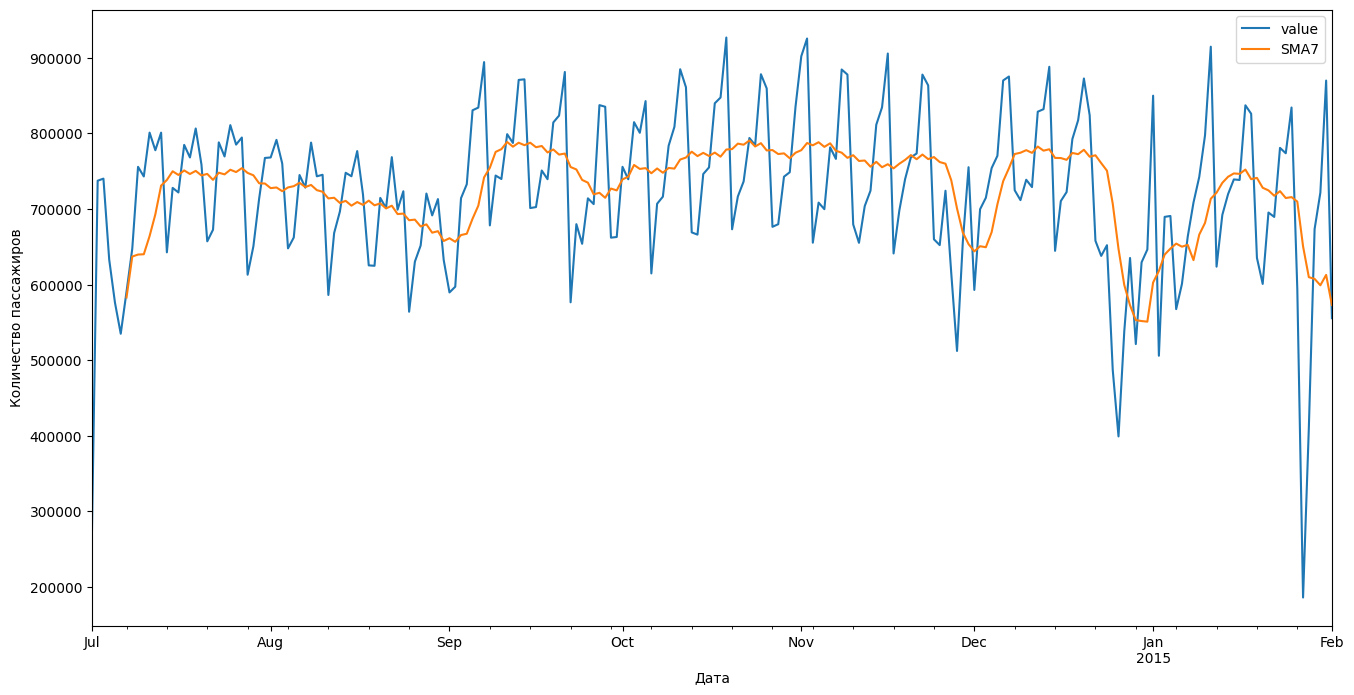

In [5]:
df_dates_a = df_dates.set_index("timestamp")
df_dates_a['SMA7'] = df_dates_a["value"].rolling(7).mean()
df_dates_a[['value', 'SMA7']].plot(figsize=(16, 8), xlabel='Дата', ylabel='Количество пассажиров')

<Axes: xlabel='Дата', ylabel='Количество пассажиров'>

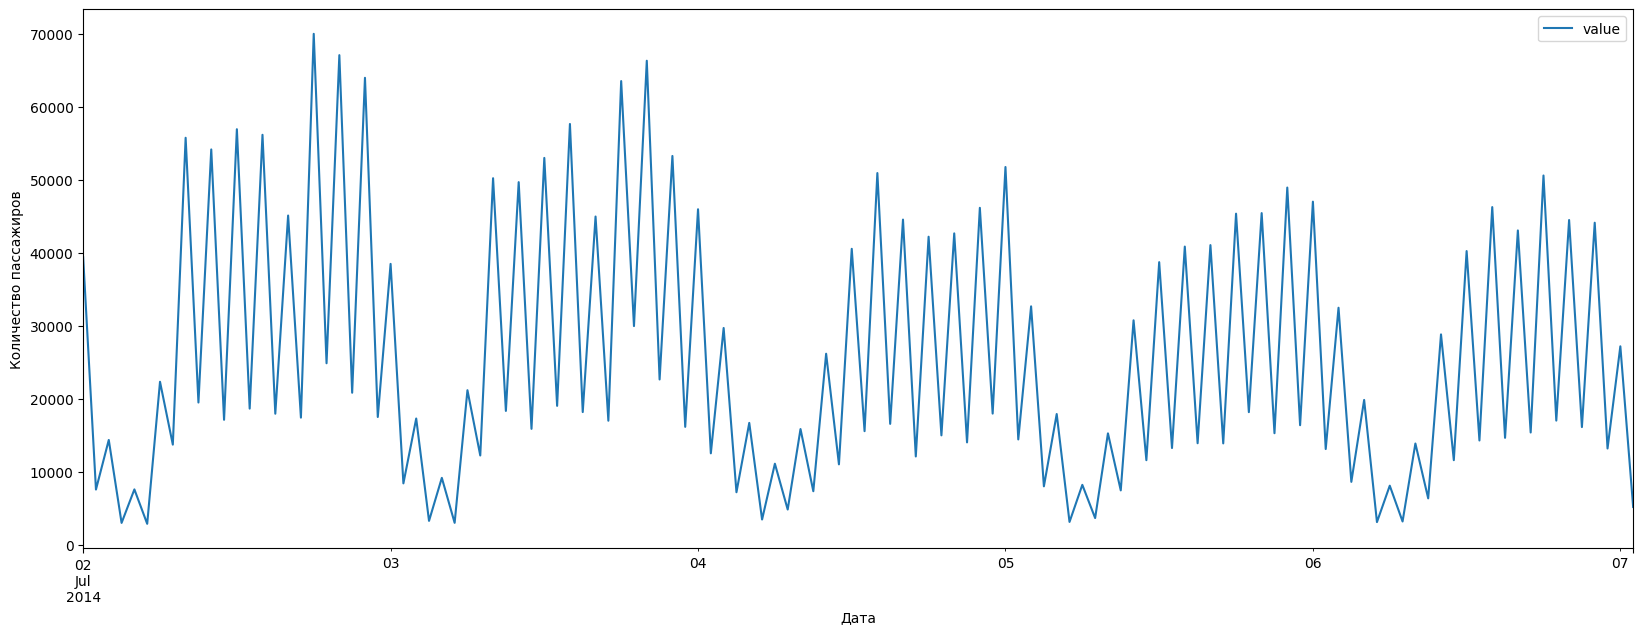

In [6]:
df_hours = df[["timestamp", "value"]].copy()
df_hours["timestamp"] = df_hours["timestamp"].dt.round('H')
df_hours = df_hours.groupby(by="timestamp").sum().reset_index()
df_hours[24:146].plot(x="timestamp", y="value", figsize=(20, 7), xlabel='Дата', ylabel='Количество пассажиров')